# Proyecto

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataSet = np.load('proyecto_training_data.npy')

In [23]:
dataP = dataSet[:int(len(dataSet)*0.8)]
dataA = dataSet[int(len(dataSet)*0.8):]
print(len(dataSet))
print(len(dataP))
print(len(dataA))
df = pd.DataFrame(dataP, columns = ['X0','X1','X2','X3','X4','X5'])
print(df)

1460
1168
292
            X0   X1      X2   X3      X4    X5
0     208500.0  7.0   856.0  8.0  2003.0  65.0
1     181500.0  6.0  1262.0  6.0  1976.0  80.0
2     223500.0  7.0   920.0  6.0  2001.0  68.0
3     140000.0  7.0   961.0  7.0  1915.0  60.0
4     250000.0  8.0  1145.0  9.0  2000.0  84.0
...        ...  ...     ...  ...     ...   ...
1163  108959.0  4.0  1258.0  6.0  1969.0  60.0
1164  194000.0  5.0  1432.0  5.0  1978.0   NaN
1165  233170.0  7.0  1502.0  7.0  2009.0  79.0
1166  245350.0  8.0  1694.0  7.0  2008.0  64.0
1167  173000.0  6.0   959.0  7.0  2000.0  58.0

[1168 rows x 6 columns]


**Media de cada variable:**

In [45]:
#print(df.iloc[:,[0]])
median = np.mean(df)
print(median[0],median[1],median[2],median[3],median[4],median[5])


180590.27739726027 6.101027397260274 1156.3236301369864 6.4854452054794525 1971.451198630137 69.94698544698545


**Valor máximo**

In [49]:
maximum = np.amax(df)
for i in range (len(maximum)) :
    print(maximum[i])

755000.0
10.0
3228.0
14.0
2010.0
313.0


**Valor mínimo**

In [51]:
minimum = np.amin(df)
p
print(minimum)

X0    34900.0
X1        1.0
X2      334.0
X3        2.0
X4     1875.0
X5       21.0
dtype: float64


**Rangos**  
Reemplazar los valores NAN con "0" de cada columna:

In [54]:
df.fillna(0)
#df['X5'] = df['X5'].replace(np.nan, 0) #no me funciono el otro

,X0,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [94]:
ranges = []
print(df.iloc[:,[0]])
for i in range(len(df.count())):
        ranges.append(np.ptp(df.iloc[:,[i]]))
print(ranges)

            X0
0     208500.0
1     181500.0
2     223500.0
3     140000.0
4     250000.0
...        ...
1163  108959.0
1164  194000.0
1165  233170.0
1166  245350.0
1167  173000.0

[1168 rows x 1 columns]
[720100.0, 9.0, 2894.0, 12.0, 135.0, 313.0]


**Desviacion estandar**

In [96]:
stdDf = np.std(df)
print(stdDf)

X0    78781.951080
X1        1.377435
X2      373.620332
X3        1.608452
X4       29.938882
X5       34.121055
dtype: float64


## **Histograma de Variables**

In [97]:
import seaborn as sns

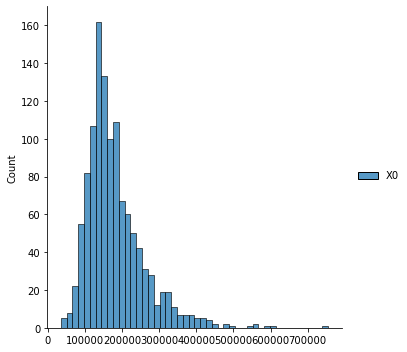

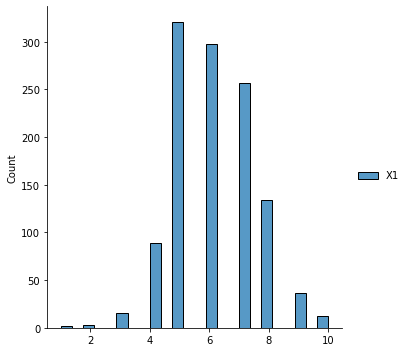

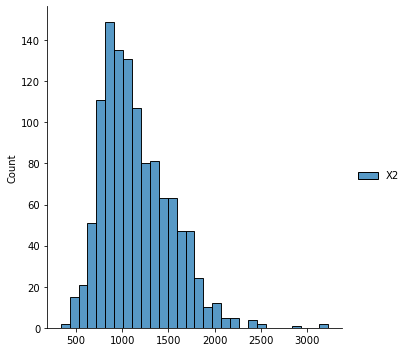

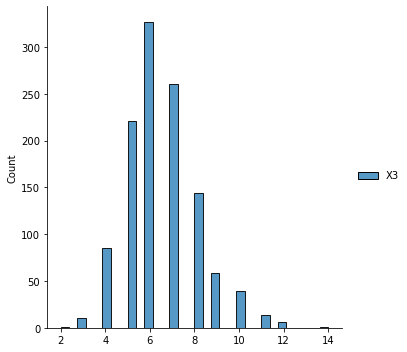

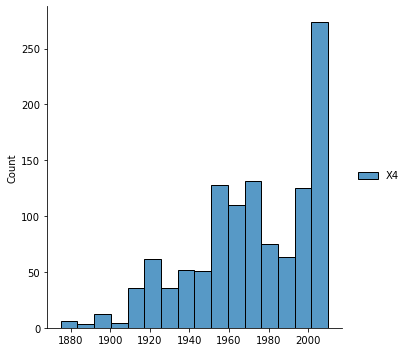

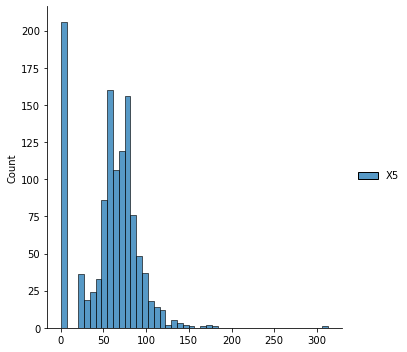

In [107]:
#ax = sns.displot(df.iloc[:,['X0']])
for i in range(len(df.count())):
    ax = sns.displot(df.iloc[:,[i]])

In [108]:
print(df)

            X0   X1      X2   X3      X4    X5
0     208500.0  7.0   856.0  8.0  2003.0  65.0
1     181500.0  6.0  1262.0  6.0  1976.0  80.0
2     223500.0  7.0   920.0  6.0  2001.0  68.0
3     140000.0  7.0   961.0  7.0  1915.0  60.0
4     250000.0  8.0  1145.0  9.0  2000.0  84.0
...        ...  ...     ...  ...     ...   ...
1163  108959.0  4.0  1258.0  6.0  1969.0  60.0
1164  194000.0  5.0  1432.0  5.0  1978.0   0.0
1165  233170.0  7.0  1502.0  7.0  2009.0  79.0
1166  245350.0  8.0  1694.0  7.0  2008.0  64.0
1167  173000.0  6.0   959.0  7.0  2000.0  58.0

[1168 rows x 6 columns]


**Calculo de coeficiente de correlacion entre Xi y Y**

$$r_i = {\frac{\sum(x-\hat{x})(y-\hat{y})}{\sqrt{\sum(x-\hat{x})^2}\sqrt{\sum(y-\hat{y})^2}}} $$

In [178]:
median

x_median = df - median #se resta cada columna por su media Xi - Xmean
x_medianpow2 = np.power((x_median),2)#se eleva cada valor al doble para obtener (Xi-Xmean)^2
y_aux = np.full(x_median.shape,x_median.iloc[:,[0]])#creación de una matriz con los valores de (Yi-Ymean)
x__mean_y__mean = x_median * y_aux#se multiplica (Xi-Xmean) * (Yi-Ymean)
ri = []

Y_Ymean_pow2 =np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[0]])))#
print(Y_Ymean_pow2)
#print(x_medianpow2)

for i in range(1,6):
    ri.append(float(np.sum(x__mean_y__mean.iloc[:,[i]])/np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[i]])))*Y_Ymean_pow2))

print(ri[0])
print(type(ri))



2692453.140375173
5755873578525.819
<class 'list'>


In [237]:
#calculando con la funcion COV
def covariance(x,y):
    #print("X",x,"Y",y)
    yc = (y - np.mean(y))
    xc = (x - np.mean(x))
    return np.sum(yc*xc)/len(x)-1

def correlation(x,y):
    cov = round(covariance(x,y),3)
    print("Covariance:",cov)
    return cov / np.std(x)*np.std(y)

corrcoef = []
for i in range(1,6):
      corrcoef.append(round(correlation(np.array(df.iloc[:,[0]]),np.array(df.iloc[:,[i]])),4))
print(corrcoef)


Covariance: 86160.444
Covariance: 18140172.581
Covariance: 71556.949
Covariance: 1259917.255
Covariance: 608072.659
[1.5064, 86029.0612, 1.4609, 478.7964, 263.3608]


<Figure size 432x288 with 0 Axes>

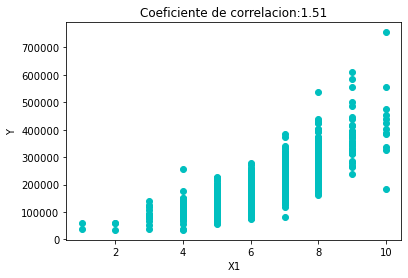

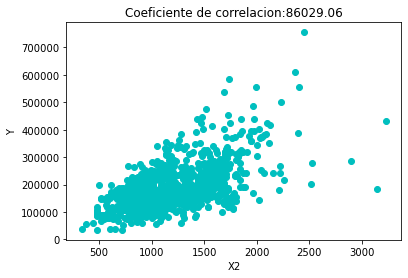

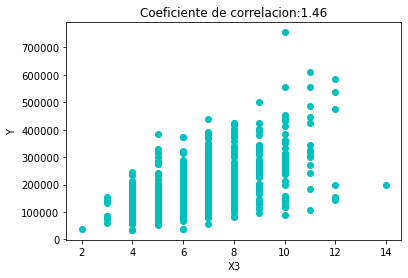

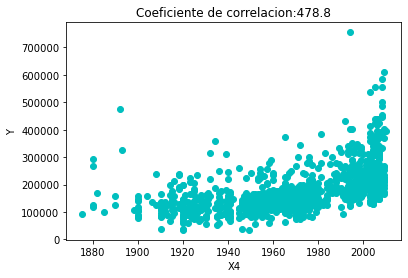

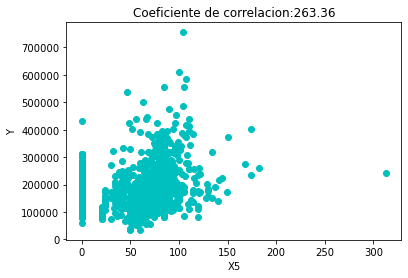

In [238]:
fig = plt.figure()

for i in range(1,6):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df.iloc[:,[i]], df.iloc[:,[0]],color="c") 
    ax.set_xlabel('X'+str(i))
    ax.set_ylabel('Y')
    ax.set_title("Coeficiente de correlacion:"+str(round(corrcoef[i-1],2)))
    plt.show()

    